El presente trabajo utiliza una base de datos pública proveniente de Kaggle titulada "Tumores Cerebrales MRI Dataset", la cual contiene imágenes de resonancia magnética cerebral clasificadas en cuatro categorías: glioma, meningioma, pituitario y sin tumor (no-tumor). Las imágenes se encuentran en formato JPG y fueron obtenidas en diferentes planos de corte, lo que permite una representación visual diversa de las distintas condiciones médicas.

El objetivo principal de este modelo es desarrollar una red neuronal convolucional capaz de clasificar automáticamente si una imagen de resonancia contiene o no un tumor cerebral. Para ello, las imágenes se procesan y etiquetan en dos categorías generales: tumor (agrupando glioma, meningioma y pituitario) y no tumor. Este enfoque binario permite enfocarse en la detección médica temprana, una tarea crítica en el ámbito de la salud, donde el diagnóstico oportuno puede marcar una gran diferencia en el tratamiento del paciente.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,002 (28.20 MB)

 Trainable params: 7,392,002 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 949ms/step - accuracy: 0.6312 - loss: 0.8667 - val_accuracy: 0.7606 - val_loss: 0.6564
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 755ms/step - accuracy: 0.6869 - loss: 0.6413 - val_accuracy: 0.7324 - val_loss: 0.5645
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 755ms/step - accuracy: 0.7585 - loss: 0.5451 - val_accuracy: 0.7606 - val_loss: 0.5312
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 899ms/step - accuracy: 0.7800 - loss: 0.4975 - val_accuracy: 0.7606 - val_loss: 0.4342
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 936ms/step - accuracy: 0.8047 - loss: 0.4183 - val_accuracy: 0.7746 - val_loss: 0.5800
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 750ms/step - accuracy: 0.8296 - loss: 0.4189 - val_accuracy: 0.7746 - val_loss: 0.4380
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 748ms/step - accuracy: 0.8332 - loss: 0.2873 - val_accuracy: 0.8169 - val_loss: 0.3728
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 775ms/step - accuracy: 0.9370 - loss: 0.1863 - val_accuracy: 0.8592 - val

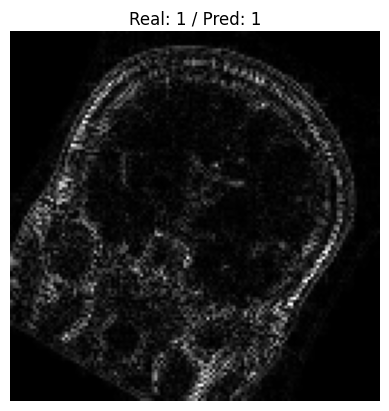

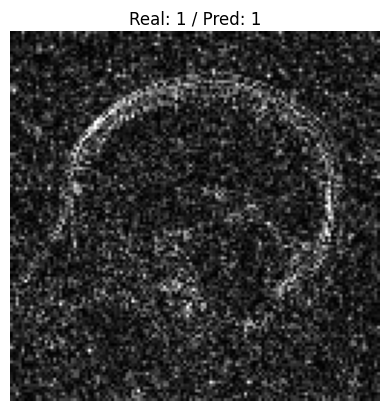

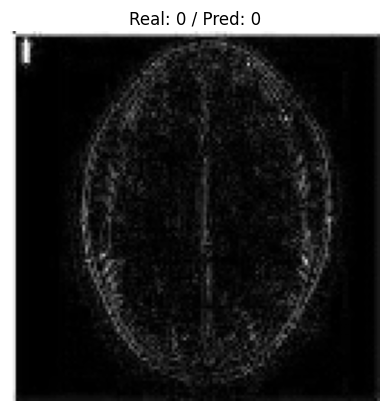

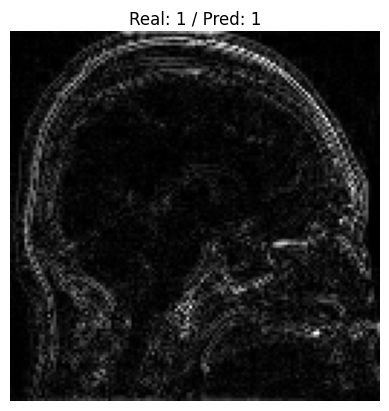

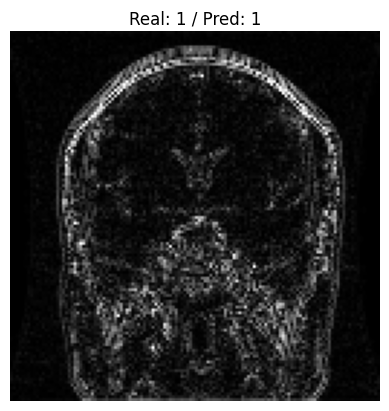

In [4]:
from IPython import get_ipython
from IPython.display import display

# %% [markdown]
# Importamos librerías
# %%
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# %% [markdown]
# Descargamos el dataset
# %%
import kagglehub

# Descargar la última versión del dataset
path = kagglehub.dataset_download("gonzajl/tumores-cerebrales-mri-dataset")
dataset_base_path = os.path.join(path, "tumores-cerebrales-mri-dataset")

# %% [markdown]
# Cargamos imágenes con filtro y muestreo aleatorio
# %%
IMG_SIZE = 128
sample_fraction = 0.01  # 1%

def sample_images(folder_path, label):
    all_images = []
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            lap = cv2.Laplacian(gray, cv2.CV_64F)
            lap = cv2.convertScaleAbs(lap)
            all_images.append(np.expand_dims(lap, axis=-1))
    # Selección aleatoria de índices
    total = len(all_images)
    sample_size = int(total * sample_fraction)
    if sample_size < 1:
        sample_size = 1
    idxs = np.random.choice(range(total), size=sample_size, replace=False)
    sampled_images = [all_images[i] for i in idxs]
    labels = [label] * sample_size
    return sampled_images, labels

def load_images_with_filter(base_path):
    X = []
    y = []

    tumor_dirs = ['meningioma', 'glioma', 'pituitary']
    no_tumor_dir = 'no-tumor'

    for folder in tumor_dirs:
        folder_path = os.path.join(base_path, folder)
        imgs, labels = sample_images(folder_path, label=1)
        X.extend(imgs)
        y.extend(labels)

    folder_path = os.path.join(base_path, no_tumor_dir)
    imgs, labels = sample_images(folder_path, label=0)
    X.extend(imgs)
    y.extend(labels)

    return np.array(X), np.array(y)

# %% [markdown]
# Preparamos los datos
# %%
X, y = load_images_with_filter(dataset_base_path)

X = X / 255.0  # Normalizar imágenes
y = to_categorical(y, 2)  # One-hot encoding: [1, 0] = no tumor, [0, 1] = tumor

# Splitting the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# %% [markdown]
# Construcción del Modelo
# %%
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 clases: tumor / no tumor
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# %% [markdown]
# Entrenamos el modelo
# %%
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# %% [markdown]
# Evaluamos el modelo
# %%
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en test: {accuracy:.4f}")

# %% [markdown]
# Visualizamos algunas predicciones
# %%
def plot_sample_predictions(X, y_true, model, n=5):
    preds = model.predict(X[:n])
    for i in range(n):
        plt.imshow(X[i].squeeze(), cmap='gray')
        pred_label = np.argmax(preds[i])
        true_label = np.argmax(y_true[i])
        plt.title(f"Real: {true_label} / Pred: {pred_label}")
        plt.axis('off')
        plt.show()

plot_sample_predictions(X_test, y_test, model)

# %% [markdown]
# Filtro Laplaciano: Se aplicó este filtro porque resalta los bordes, lo que permite destacar regiones con cambios abruptos de intensidad. Esto es útil en resonancias magnéticas, ya que los tumores suelen tener bordes definidos. El realce ayuda a que la red neuronal enfoque su aprendizaje en patrones estructurales importantes para la clasificación.
# %%

Dado que las imágenes médicas contienen mucha información irrelevante para el modelo, se aplicó un preprocesamiento específico utilizando el filtro Laplaciano. Este filtro se encarga de resaltar los bordes y cambios abruptos de intensidad, lo cual es sumamente útil en resonancias magnéticas, ya que los tumores suelen presentar bordes bien definidos que los distinguen del tejido sano. Al aplicar este filtro, se facilita que la red neuronal concentre su aprendizaje en características estructurales clave, mejorando potencialmente su capacidad de generalización y precisión en la clasificación.

Con este enfoque, el modelo busca no solo una alta precisión, sino también una mejor comprensión de las regiones más relevantes para el diagnóstico automatizado.